In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; #sns.set()
import os

import geopandas as gpd
import pysal as ps


pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# import pandas_profiling
# df.profile_report(style={'full_width':True})

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
data_dir = '../data/'

df_agro = pd.read_csv(data_dir + 'exportacao/exportacao-agronegocio-limpo.csv')

print(df_agro.columns)

df_agro

Index(['STATE', 'MUNICIPALITY', 'BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD', 'STATE_NORM', 'MUNICIPALITY_NORM'], dtype='object')


STATE          MUNICIPALITY  BEEF_EQUIVALENT_TONNES   BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD STATE_NORM   MUNICIPALITY_NORM
0          "ACRE"          "ACRELANDIA"               53.223898  147319.447241                    NaN           NaN       acre          acrelandia
1          "ACRE"     "AGGREGATED ACRE"              159.397731  414084.016812                    NaN           NaN       acre     aggregated acre
2          "ACRE"        "ASSIS BRASIL"                1.866278    4929.172690                    NaN           NaN       acre        assis brasil
3          "ACRE"           "BRASILEIA"               90.780715  250927.581769                    NaN           NaN       acre           brasileia
4          "ACRE"              "BUJARI"              195.311511  536599.015444                    NaN           NaN       acre              bujari
...           ...                   ...                     ...            ...                    ...           ...        ...                 ...
3429  "SAO PAULO"           "VIRADOURO"                     NaN            NaN               4068.352  0.000000e+00  sao paulo           viradouro
3430  "TOCANTINS"          "CENTENARIO"                     NaN            NaN               8834.453  4.150179e+05  tocantins          centenario
3431  "TOCANTINS"  "LAGOA DO TOCANTINS"                     NaN            NaN               7852.848  0.000000e+00  tocantins  lagoa do tocantins
3432  "TOCANTINS"             "LIZARDA"                     NaN            NaN               4417.227  6.331097e+05  tocantins             lizarda
3433  "TOCANTINS"            "MATEIROS"                     NaN            NaN             118185.348  3.372470e+06  tocantins            mateiros

[3434 rows x 8 columns]

In [14]:
df_amb = pd.read_csv(data_dir + 'IBGE-municipios/ambiente-limpo.csv')

print(df_amb.columns)

df_amb

Index(['CodMun', 'Condições climáticas extremas (secas, enxurradas)', 'Poluição do ar', 'Poluição de algum corpo d’água', 'Assoreamento de algum corpo d’água', 'Diminuição de vazão de algum corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo (por agrotóxicos, fertilizantes)', 'Perda de solos por erosão e/ou desertificação (voçorocas, arenização)', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento (destinação inadequada do esgoto doméstico)', 'Outros', 'ID', 'CD_GCUF', 'NM_UF', 'NM_UF_SIGLA', 'CD_GCMUN', 'NM_MUN_2018', 'AR_MUN_2018', 'REGIAO', 'COD UF', 'UF', 'NOME MUNIC', 'POP EST', 'CLASSE POP', 'NM_UF_NORM', 'NM_MUN_2018_NORM'], dtype='object')


CodMun  Condições climáticas extremas (secas, enxurradas)  Poluição do ar  Poluição de algum corpo d’água  Assoreamento de algum corpo d’água  Diminuição de vazão de algum corpo d’água  Desmatamentos  Queimadas  Contaminação do solo (por agrotóxicos, fertilizantes)  Perda de solos por erosão e/ou desertificação (voçorocas, arenização)  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento (destinação inadequada do esgoto doméstico)  Outros      ID  CD_GCUF             NM_UF NM_UF_SIGLA   CD_GCMUN            NM_MUN_2018  AR_MUN_2018            REGIAO  COD UF  UF            NOME MUNIC    POP EST             CLASSE POP        NM_UF_NORM      NM_MUN_2018_NORM
0     1100015                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     1.0     11.0          Rondônia          RO  1100015.0  ALTA FLORESTA D'OESTE     7067.025         1 - Norte    11.0  RO  Alta Floresta DOeste    25437.0    4 - 20001 até 50000          rondonia  alta floresta doeste
1     1100023                                                0.0             0.0                             0.0                                 0.0                                        0.0            0.0        1.0                                                0.0                                                    0.0                                                            1.0                                           0.0                                                0.0                                                   1.0                   0.0     2.0     11.0          Rondônia          RO  1100023.0              ARIQUEMES     4426.571         1 - Norte    11.0  RO             Ariquemes   107345.0  6 - 100001 até 500000          rondonia             ariquemes
2     1100031                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     3.0     11.0          Rondônia          RO  1100031.0                 CABIXI     1314.352         1 - Norte    11.0  RO                Cabixi     6224.0     2 - 5001 até 10000          rondonia                cabixi
3     1100049                                                0.0             0.0                             1.0                                 1.0                                        0.0            0.0        1.0                                                0.0                                                    0.0                                                            0.0                                           0.0                                                0.0                                                   0.0                   0.0     4.0     11.0          Rondônia          RO  1100049.0                 CACOAL     3792.892         1 - Norte    11.0  RO                Cacoal    88507.0   5 - 50001 até 100000          rondonia                cacoal
4     1100056                                                NaN             NaN                           

In [15]:
df_merged = pd.merge(df_amb, df_agro, left_on=['NM_UF_NORM', 'NM_MUN_2018_NORM'], 
                     right_on=['STATE_NORM', 'MUNICIPALITY_NORM'],
                    how='left')

df_merged

CodMun  Condições climáticas extremas (secas, enxurradas)  Poluição do ar  Poluição de algum corpo d’água  Assoreamento de algum corpo d’água  Diminuição de vazão de algum corpo d’água  Desmatamentos  Queimadas  Contaminação do solo (por agrotóxicos, fertilizantes)  Perda de solos por erosão e/ou desertificação (voçorocas, arenização)  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento (destinação inadequada do esgoto doméstico)  Outros      ID  CD_GCUF             NM_UF NM_UF_SIGLA   CD_GCMUN            NM_MUN_2018  AR_MUN_2018            REGIAO  COD UF  UF            NOME MUNIC    POP EST             CLASSE POP        NM_UF_NORM      NM_MUN_2018_NORM               STATE             MUNICIPALITY  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD        STATE_NORM     MUNICIPALITY_NORM
0     1100015                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     1.0     11.0          Rondônia          RO  1100015.0  ALTA FLORESTA D'OESTE     7067.025         1 - Norte    11.0  RO  Alta Floresta DOeste    25437.0    4 - 20001 até 50000          rondonia  alta floresta doeste          "RONDONIA"  "ALTA FLORESTA D'OESTE"             6602.223948  1.718931e+07            1184.154000  1.387360e+05          rondonia  alta floresta doeste
1     1100023                                                0.0             0.0                             0.0                                 0.0                                        0.0            0.0        1.0                                                0.0                                                    0.0                                                            1.0                                           0.0                                                0.0                                                   1.0                   0.0     2.0     11.0          Rondônia          RO  1100023.0              ARIQUEMES     4426.571         1 - Norte    11.0  RO             Ariquemes   107345.0  6 - 100001 até 500000          rondonia             ariquemes          "RONDONIA"              "ARIQUEMES"             9132.326912  2.377232e+07            9612.699000  2.558014e+06          rondonia             ariquemes
2     1100031                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     3.0     11.0          Rondônia          RO  1100031.0                 CABIXI     1314.352         1 - Norte    11.0  RO                Cabixi     6224.0     2 - 5001 até 10000          rondonia                cabixi          "RONDONIA"                 "CABIXI"             2253.310650  5.862369e+06           61681.266000  1.959110e+06          rondonia                cabixi
3     1100049                                                0.0             0.0                             1.0                                 1.0                                        0.0            0.0        1.0                              

In [16]:
df_merged.columns


Index(['CodMun', 'Condições climáticas extremas (secas, enxurradas)', 'Poluição do ar', 'Poluição de algum corpo d’água', 'Assoreamento de algum corpo d’água', 'Diminuição de vazão de algum corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo (por agrotóxicos, fertilizantes)', 'Perda de solos por erosão e/ou desertificação (voçorocas, arenização)', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento (destinação inadequada do esgoto doméstico)', 'Outros', 'ID', 'CD_GCUF', 'NM_UF', 'NM_UF_SIGLA', 'CD_GCMUN', 'NM_MUN_2018', 'AR_MUN_2018', 'REGIAO', 'COD UF', 'UF', 'NOME MUNIC', 'POP EST', 'CLASSE POP', 'NM_UF_NORM', 'NM_MUN_2018_NORM', 'STATE', 'MUNICIPALITY', 'BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD', 'STATE_NORM', 'MUNICIPALITY_NORM'], dtype='object')

In [17]:
cols = ['Condições climáticas extremas (secas, enxurradas)', 'Poluição do ar', 'Poluição de algum corpo d’água', 'Assoreamento de algum corpo d’água', 'Diminuição de vazão de algum corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo (por agrotóxicos, fertilizantes)', 'Perda de solos por erosão e/ou desertificação (voçorocas, arenização)', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento (destinação inadequada do esgoto doméstico)']

values = ['BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD']

df_basic = df_merged[cols + values].fillna(-1)

df_grouped = df_basic.melt(values).groupby(['variable', 'value']).mean()

df_grouped

BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD
variable                                           value                                                                           
Assoreamento de algum corpo d’água                 -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               283.813562  7.781743e+05           17108.647807  7.734341e+05
                                                    1.0               527.326275  1.469540e+06           22206.560557  1.018581e+06
Condições climáticas extremas (secas, enxurradas)  -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               457.700499  1.262585e+06           22938.396418  1.052508e+06
                                                    1.0               192.780102  5.306327e+05           12627.202980  5.594197e+05
Contaminação do solo (por agrotóxicos, fertiliz... -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               329.747005  9.098952e+05           17744.417549  8.169023e+05
                                                    1.0               439.340818  1.198008e+06           25771.158106  9.760240e+05
Degradação de áreas legalmente protegidas          -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               330.959692  9.138344e+05           18274.316331  8.365462e+05
                                                    1.0               411.060764  1.112420e+06           17098.520481  6.673168e+05
Desmatamentos                                      -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               345.079464  9.535975e+05           16164.414926  6.812450e+05
                                                    1.0               310.965973  8.511947e+05           23795.367518  1.223521e+06
Diminuição da biodiversidade (fauna e flora)       -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               345.793590  9.525496e+05           18527.271396  8.340890e+05
                                                    1.0               208.137661  5.840833e+05           13947.682246  7.199221e+05
Diminuição de vazão de algum corpo d’água          -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               373.738371  1.018288e+06           21940.550927  9.909293e+05
                                                    1.0               245.273801  7.052522e+05            9217.604752  4.296647e+05
Existência de moradia em situação de risco ambi... -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               333.901329  9.225766e+05           17165.880171  8.141836e+05
                                                    1.0               352.071457  9.549335e+05           26226.290304  9.171814e+05
Falta de saneamento (destinação inadequada do e... -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               361.184075  1.010794e+06           19287.304571  8.896853e+05
                                                    1.0               292.122358  7.792272e+05           16310.235556  7.150601e+05
Perda de solos por erosão e/ou desertificação (... -1.0               372.225225  1.047559e+06           17340.347996  6.840180e+05
                                                    0.0               321.605907  8.834230e+05    

In [18]:
variable = 'BEEF_EQUIVALENT_TONNES'
title = 'Toneladas de carne exportadas'

mean = df_basic[variable].mean()

def get_df_variable(df_grouped, variable):
    df_agro = df_grouped.reset_index().pivot(index='variable', columns='value', values=variable)

    df_agro = df_agro.sort_values(1)

    df_agro.columns = ['Não Respondeu', 'Sem Ocorrência', 'Com Ocorrência']

    return df_agro

df_agro = get_df_variable(df_grouped, variable)
df_agro

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Condições climáticas extremas (secas, enxurradas)      372.225225      457.700499      192.780102
Diminuição da biodiversidade (fauna e flora)           372.225225      345.793590      208.137661
Diminuição de vazão de algum corpo d’água              372.225225      373.738371      245.273801
Falta de saneamento (destinação inadequada do e...     372.225225      361.184075      292.122358
Desmatamentos                                          372.225225      345.079464      310.965973
Existência de moradia em situação de risco ambi...     372.225225      333.901329      352.071457
Poluição de algum corpo d’água                         372.225225      319.888792      391.810527
Degradação de áreas legalmente protegidas              372.225225      330.959692      411.060764
Contaminação do solo (por agrotóxicos, fertiliz...     372.225225      329.747005      439.340818
Perda de solos por erosão e/ou desertificação (...     372.225225      321.605907      446.282705
Queimadas                                              372.225225      278.349968      453.254924
Poluição do ar                                         372.225225      327.866336      459.570647
Assoreamento de algum corpo d’água                     372.225225      283.813562      527.326275

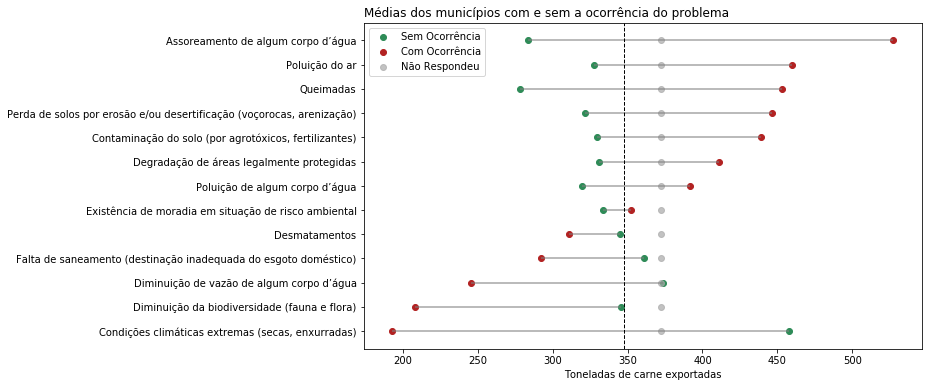

In [19]:

def show_chart(df_var, title, mean):
    my_range=range(1,len(df_agro.index)+1)
    plt.subplots(figsize=(10, 6))
    plt.hlines(y=my_range, xmin=df_var['Sem Ocorrência'], xmax=df_var['Com Ocorrência'], color='grey', alpha=0.7)
    plt.scatter(df_var['Sem Ocorrência'], my_range, color='seagreen', alpha=1, label='Sem Ocorrência')
    plt.scatter(df_var['Com Ocorrência'], my_range, color='firebrick', alpha=1 , label='Com Ocorrência')
    plt.scatter(df_var['Não Respondeu'], my_range, color='darkgrey', alpha=0.7 , label='Não Respondeu')
    plt.legend()

    # Add title and axis names
    plt.yticks(my_range, df_var.index)
    plt.title("Médias dos municípios com e sem a ocorrência do problema", loc='left')
    plt.xlabel(title)
    plt.axvline(x=mean, color='k', linestyle='--', lw=1)
    # plt.ylabel('Group')
    plt.show()

show_chart(df_agro, title, mean)    

In [20]:
import geopandas as gpd
import pysal as ps

shp_dir = data_dir + '/IBGE-municipios/shapefiles-br_municipios/'

dfm = gpd.read_file(shp_dir + 'BRMUE250GC_SIR.shp')

dfm['CD_GEOCMU'] = dfm['CD_GEOCMU'].astype(int)

dfm

NM_MUNICIP  CD_GEOCMU                                           geometry
0                          CAIUÁ    3509106  POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...
1                       CASTILHO    3511003  POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...
2                        DRACENA    3514403  POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...
3               ESTRELA DO NORTE    3515301  POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...
4     EUCLIDES DA CUNHA PAULISTA    3515350  POLYGON ((-52.44569 -22.60828, -52.44569 -22.6...
...                          ...        ...                                                ...
5567               TEIXEIRÓPOLIS    1101559  POLYGON ((-62.12258 -10.89939, -62.12418 -10.9...
5568                   THEOBROMA    1101609  POLYGON ((-61.95442 -9.94968, -61.95552 -9.950...
5569                       URUPÁ    1101708  POLYGON ((-62.15601 -11.02598, -62.15500 -11.0...
5570               VALE DO ANARI    1101757  POLYGON ((-61.57464 -9.71779, -61.58190 -9.711...
5571             VALE DO PARAÍSO    1101807  POLYGON ((-61.97267 -10.06753, -61.97104 -10.0...

[5572 rows x 3 columns]

In [21]:
df_geo_merged = dfm.merge(df_merged, left_on='CD_GEOCMU', right_on='CodMun')

df_geo_merged.head()

NM_MUNICIP  CD_GEOCMU                                           geometry   CodMun  Condições climáticas extremas (secas, enxurradas)  Poluição do ar  Poluição de algum corpo d’água  Assoreamento de algum corpo d’água  Diminuição de vazão de algum corpo d’água  Desmatamentos  Queimadas  Contaminação do solo (por agrotóxicos, fertilizantes)  Perda de solos por erosão e/ou desertificação (voçorocas, arenização)  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento (destinação inadequada do esgoto doméstico)  Outros      ID  CD_GCUF      NM_UF NM_UF_SIGLA   CD_GCMUN                 NM_MUN_2018  AR_MUN_2018       REGIAO  COD UF  UF                  NOME MUNIC  POP EST           CLASSE POP NM_UF_NORM            NM_MUN_2018_NORM        STATE                  MUNICIPALITY  BEEF_EQUIVALENT_TONNES  BEEF_FOB_USD  SOY_EQUIVALENT_TONNES   SOY_FOB_USD STATE_NORM  \
0                       CAIUÁ    3509106  POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...  3509106                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3375.0     35.0  São Paulo          SP  3509106.0                       CAIUÁ      551.159  3 - Sudeste    35.0  SP                       Caiuá   5695.0   2 - 5001 até 10000  sao paulo                       caiua  "SAO PAULO"                       "CAIUA"              864.044855  2.521550e+06             882.889000   7781.523553  sao paulo   
1                    CASTILHO    3511003  POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...  3511003                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3398.0     35.0  São Paulo          SP  3511003.0                    CASTILHO     1065.318  3 - Sudeste    35.0  SP                    Castilho  20362.0  4 - 20001 até 50000  sao paulo                    castilho  "SAO PAULO"                    "CASTILHO"             1021.235947  2.981579e+06            2542.719998  43936.948358  sao paulo   
2                     DRACENA    3514403  POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...  3514403                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN  3427.0     35.0  São Paulo          SP  3514403.0                     DRACENA      487.688  3 - Sudeste    35.0  SP                     Dracena  46324.0  4 - 20001 até 50000  sao paulo                     dracena  "SAO PAULO"                     "DRACENA"               76.318278  2.309337e+05                    NaN           NaN  sao paulo   
3            ESTRELA DO NORTE    3515301  POLYG

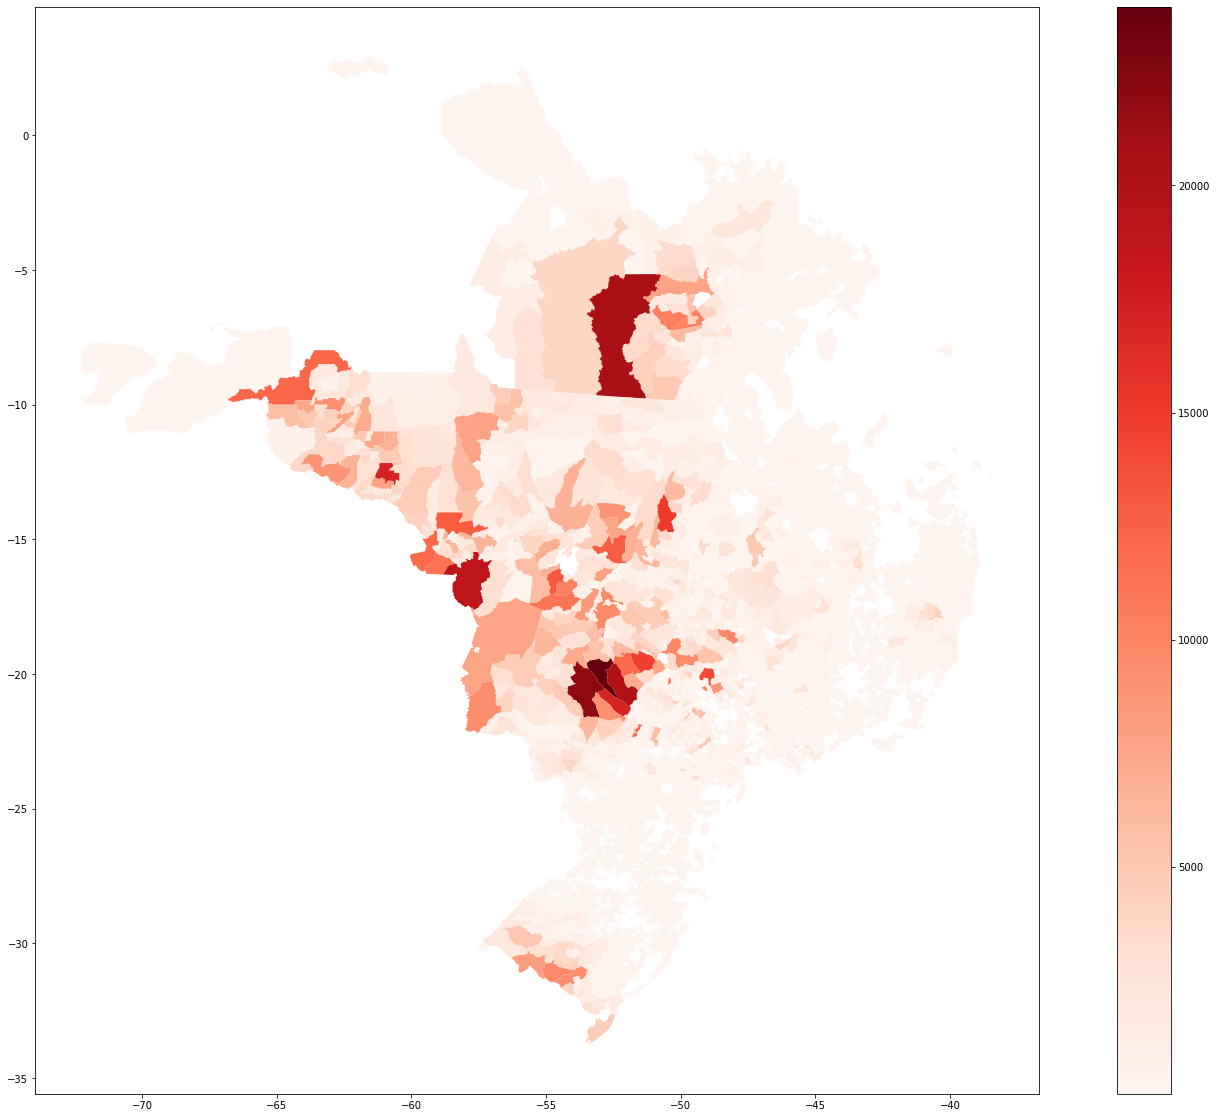

In [22]:
df_geo_merged.plot(column=variable, cmap = 'Reds', figsize=(28, 20), legend=True)

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Condições climáticas extremas (secas, enxurradas)      372.225225      457.700499      192.780102
Diminuição da biodiversidade (fauna e flora)           372.225225      345.793590      208.137661
Diminuição de vazão de algum corpo d’água              372.225225      373.738371      245.273801
Falta de saneamento (destinação inadequada do e...     372.225225      361.184075      292.122358
Desmatamentos                                          372.225225      345.079464      310.965973
Existência de moradia em situação de risco ambi...     372.225225      333.901329      352.071457
Poluição de algum corpo d’água                         372.225225      319.888792      391.810527
Degradação de áreas legalmente protegidas              372.225225      330.959692      411.060764
Contaminação do solo (por agrotóxicos, fertiliz...     372.225225      329.747005      439.340818
Perda de solos por erosão e/ou desertificação (...     372.225225      321.605907      446.282705
Queimadas                                              372.225225      278.349968      453.254924
Poluição do ar                                         372.225225      327.866336      459.570647
Assoreamento de algum corpo d’água                     372.225225      283.813562      527.326275

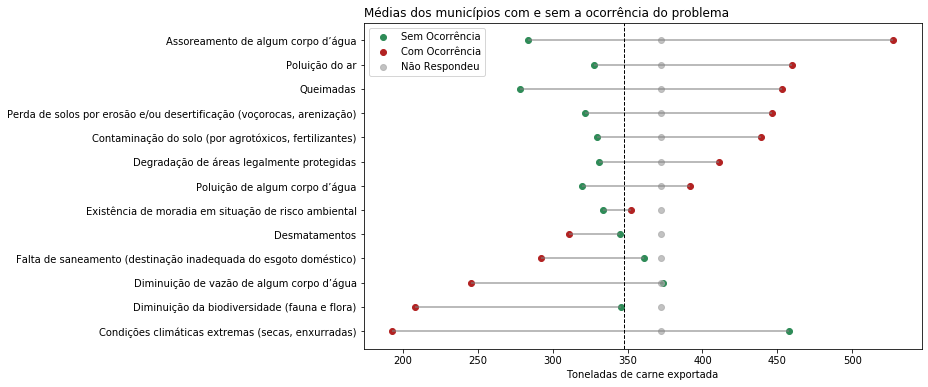

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Condições climáticas extremas (secas, enxurradas)    1.047559e+06    1.262585e+06    5.306327e+05
Diminuição da biodiversidade (fauna e flora)         1.047559e+06    9.525496e+05    5.840833e+05
Diminuição de vazão de algum corpo d’água            1.047559e+06    1.018288e+06    7.052522e+05
Falta de saneamento (destinação inadequada do e...   1.047559e+06    1.010794e+06    7.792272e+05
Desmatamentos                                        1.047559e+06    9.535975e+05    8.511947e+05
Existência de moradia em situação de risco ambi...   1.047559e+06    9.225766e+05    9.549335e+05
Poluição de algum corpo d’água                       1.047559e+06    8.857542e+05    1.066893e+06
Degradação de áreas legalmente protegidas            1.047559e+06    9.138344e+05    1.112420e+06
Contaminação do solo (por agrotóxicos, fertiliz...   1.047559e+06    9.098952e+05    1.198008e+06
Poluição do ar                                       1.047559e+06    9.047353e+05    1.254479e+06
Perda de solos por erosão e/ou desertificação (...   1.047559e+06    8.834230e+05    1.255173e+06
Queimadas                                            1.047559e+06    7.590776e+05    1.266537e+06
Assoreamento de algum corpo d’água                   1.047559e+06    7.781743e+05    1.469540e+06

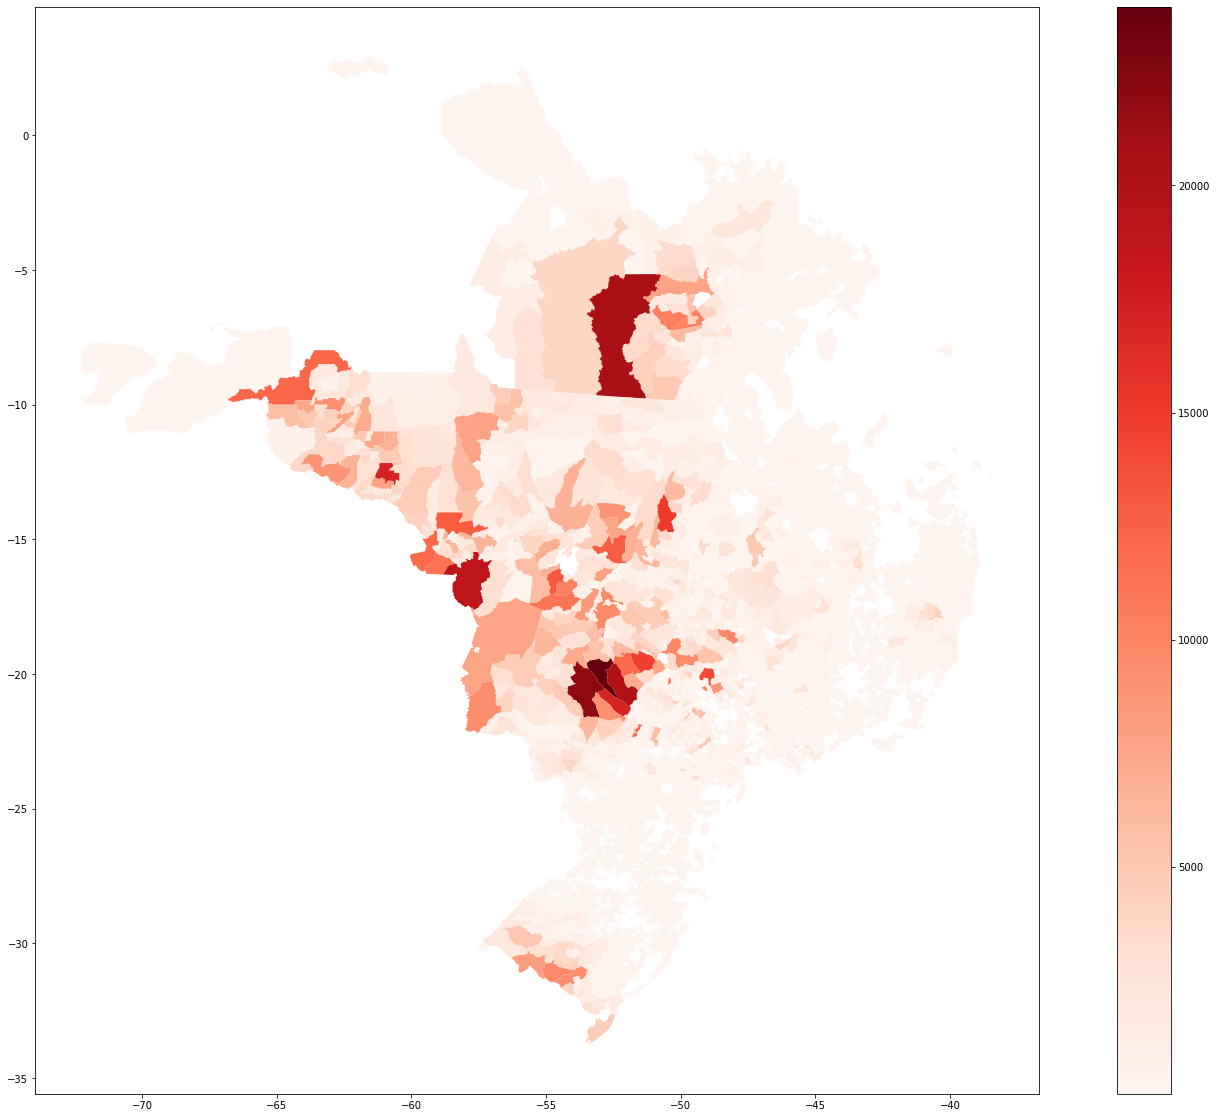

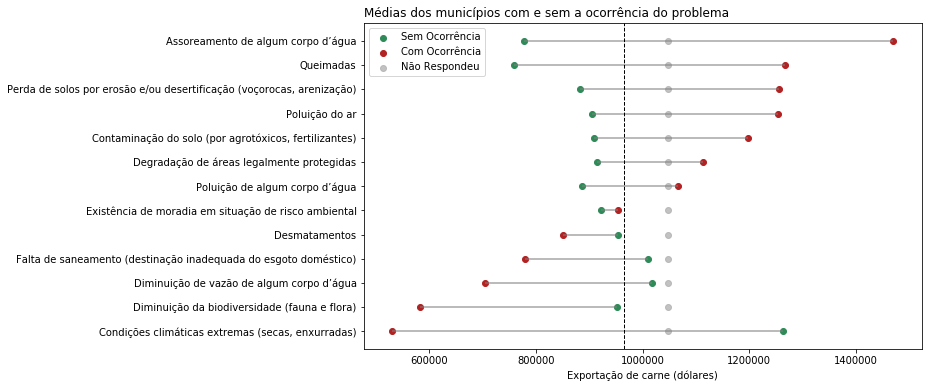

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Diminuição de vazão de algum corpo d’água            17340.347996    21940.550927     9217.604752
Condições climáticas extremas (secas, enxurradas)    17340.347996    22938.396418    12627.202980
Diminuição da biodiversidade (fauna e flora)         17340.347996    18527.271396    13947.682246
Falta de saneamento (destinação inadequada do e...   17340.347996    19287.304571    16310.235556
Degradação de áreas legalmente protegidas            17340.347996    18274.316331    17098.520481
Poluição de algum corpo d’água                       17340.347996    18429.413470    17406.815187
Assoreamento de algum corpo d’água                   17340.347996    17108.647807    22206.560557
Queimadas                                            17340.347996    15728.455621    23231.994987
Desmatamentos                                        17340.347996    16164.414926    23795.367518
Contaminação do solo (por agrotóxicos, fertiliz...   17340.347996    17744.417549    25771.158106
Existência de moradia em situação de risco ambi...   17340.347996    17165.880171    26226.290304
Perda de solos por erosão e/ou desertificação (...   17340.347996    16810.124502    28874.255866
Poluição do ar                                       17340.347996    17392.738732    30513.061238

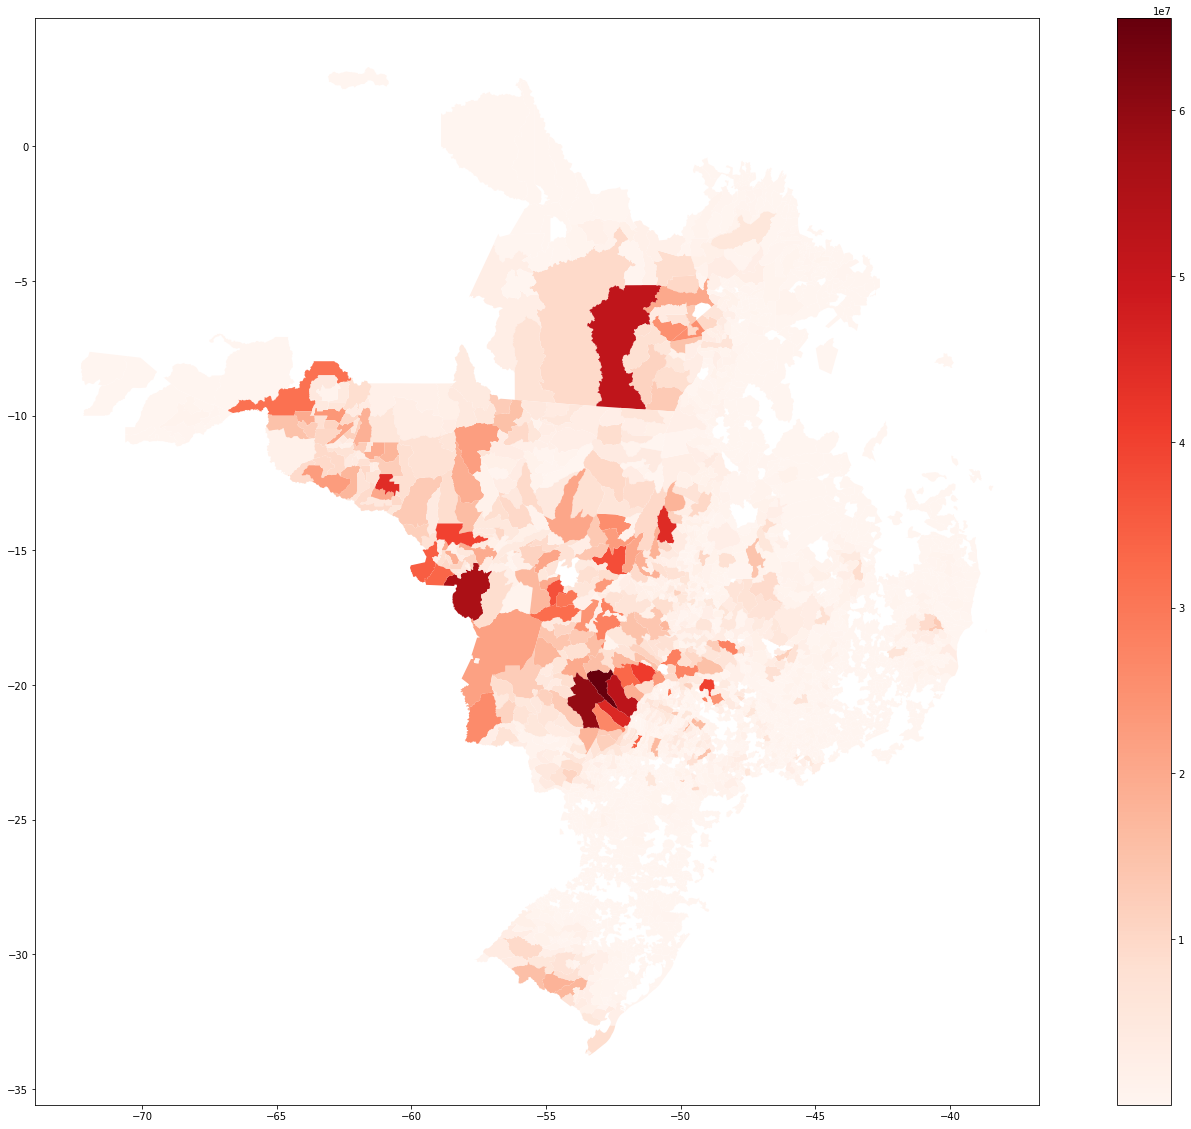

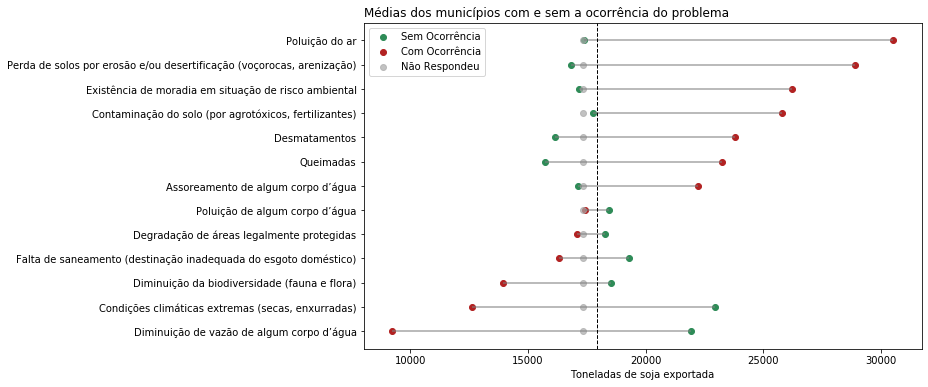

Não Respondeu  Sem Ocorrência  Com Ocorrência
variable                                                                                         
Diminuição de vazão de algum corpo d’água           684018.006873    9.909293e+05    4.296647e+05
Condições climáticas extremas (secas, enxurradas)   684018.006873    1.052508e+06    5.594197e+05
Degradação de áreas legalmente protegidas           684018.006873    8.365462e+05    6.673168e+05
Falta de saneamento (destinação inadequada do e...  684018.006873    8.896853e+05    7.150601e+05
Diminuição da biodiversidade (fauna e flora)        684018.006873    8.340890e+05    7.199221e+05
Poluição de algum corpo d’água                      684018.006873    8.558808e+05    7.220593e+05
Existência de moradia em situação de risco ambi...  684018.006873    8.141836e+05    9.171814e+05
Contaminação do solo (por agrotóxicos, fertiliz...  684018.006873    8.169023e+05    9.760240e+05
Assoreamento de algum corpo d’água                  684018.006873    7.734341e+05    1.018581e+06
Perda de solos por erosão e/ou desertificação (...  684018.006873    7.841542e+05    1.146741e+06
Desmatamentos                                       684018.006873    6.812450e+05    1.223521e+06
Queimadas                                           684018.006873    6.047668e+05    1.276081e+06
Poluição do ar                                      684018.006873    7.683458e+05    1.703752e+06

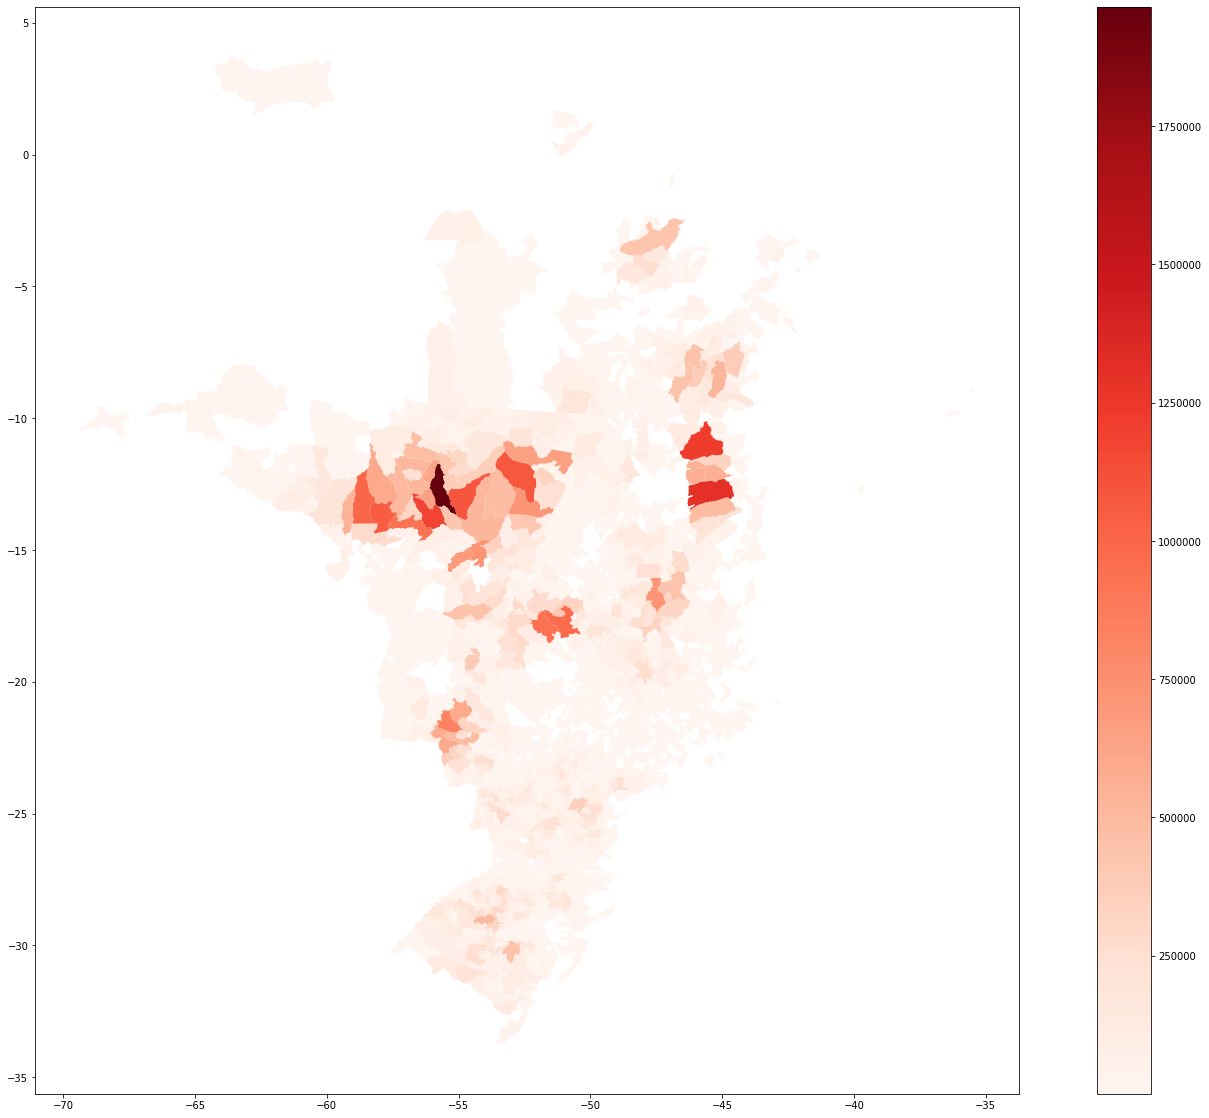

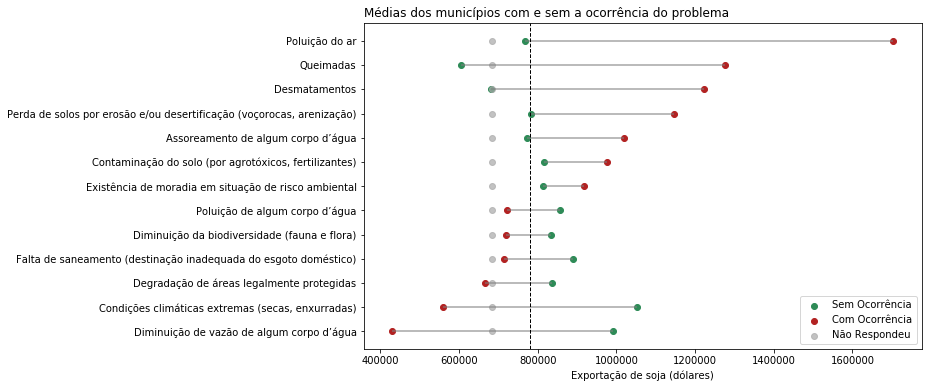

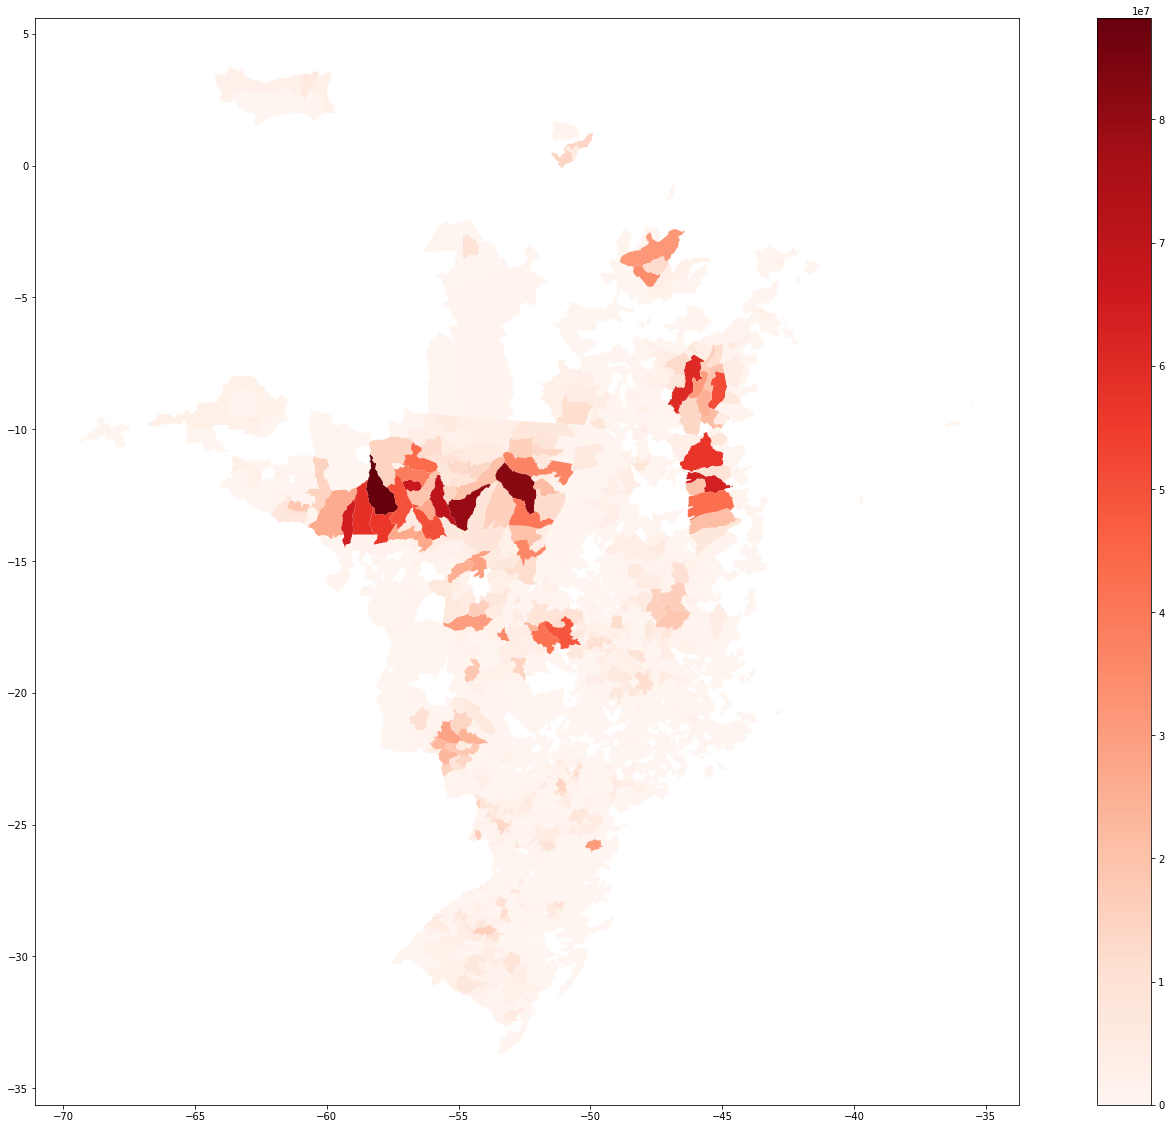

In [23]:
values = ['BEEF_EQUIVALENT_TONNES', 'BEEF_FOB_USD', 'SOY_EQUIVALENT_TONNES', 'SOY_FOB_USD']
title = ['Toneladas de carne exportada', 'Exportação de carne (dólares)', 'Toneladas de soja exportada', 'Exportação de soja (dólares)']

for variable, title in zip(values, title):
    mean = df_basic[variable].mean()
    df_agro = get_df_variable(df_grouped, variable)
    display(df_agro)
    show_chart(df_agro, title, mean) 
    df_geo_merged.plot(column=variable, cmap = 'Reds', figsize=(28, 20), legend=True)
    
